In [43]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [44]:
tickers = ['SSL']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1',)['Close']

In [45]:
data.tail()

,SSL
Date,
2020-04-27,4.08
2020-04-28,4.34
2020-04-29,5.13
2020-04-30,4.78
2020-05-01,4.21


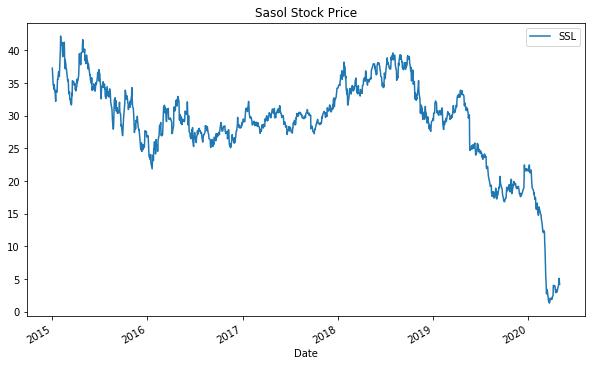

In [46]:
data.plot(figsize=(10, 6))
plt.title("Sasol Stock Price")
plt.show()

## Log Returns

In [47]:
log_returns = np.log(1 + data.pct_change())

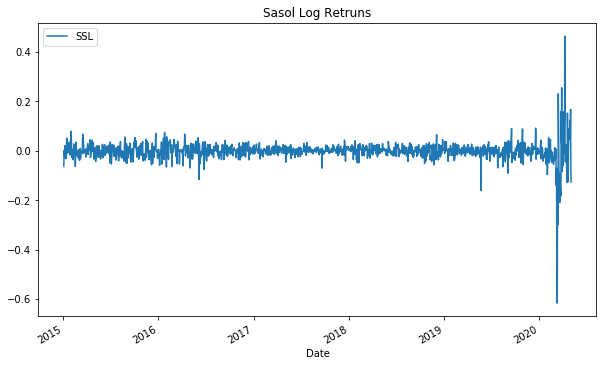

In [48]:
log_returns.plot(figsize = (10, 6))
plt.title("Sasol Log Retruns")
plt.show()

## Compute Drift

In [49]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
drift

SSL   -0.002359
dtype: float64

In [50]:
norm.ppf(0.95)

1.6448536269514722

In [51]:
x = np.random.rand(10, 2)
x

array([[0.18773734, 0.80396493],
       [0.40739453, 0.15621605],
       [0.31906728, 0.14391295],
       [0.16121283, 0.03073266],
       [0.90587241, 0.61978638],
       [0.34656098, 0.56290286],
       [0.83266475, 0.54587784],
       [0.32898369, 0.24695376],
       [0.55082715, 0.71047591],
       [0.55741389, 0.35917069]])

In [52]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.48221384, -0.28716936],
       [ 0.48871448,  1.33432588],
       [-0.16638459, -0.42768246],
       [ 1.00151592, -0.59901931],
       [-1.66031146,  0.15796402],
       [ 2.25910513,  0.30238798],
       [ 1.0792335 , -0.5983989 ],
       [-1.12516417, -0.44595157],
       [ 1.16887166,  0.78003767],
       [ 1.18848387, -0.63449838]])

In [53]:
t_intervals = 100
iterations = 10
stdev = log_returns.std()
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [54]:
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

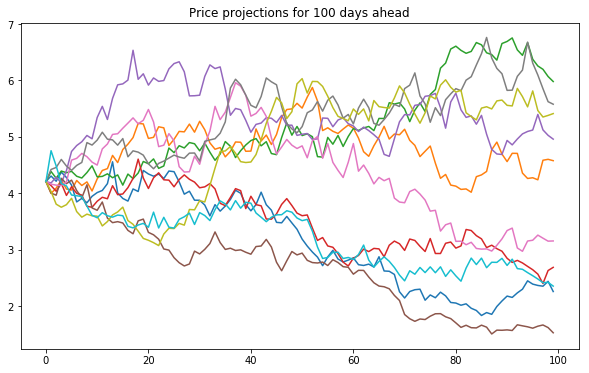

In [56]:
plt.figure(figsize=(10,6))
plt.title("Price projections for 100 days ahead")
plt.plot(price_list);

## Average Price Prediction

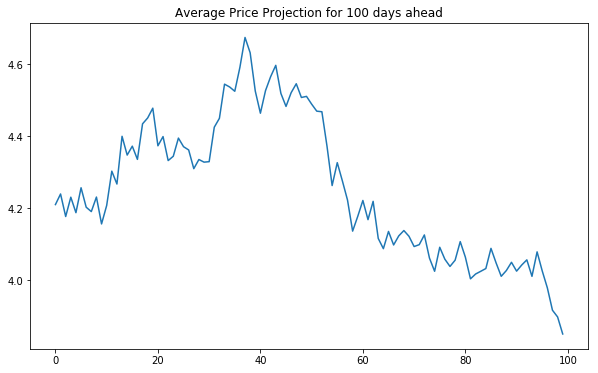

In [65]:
average =[i.mean() for i in price_list]
plt.figure(figsize=(10,6))
plt.title("Average Price Projection for 100 days ahead")
plt.plot(average);